In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df_train = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv('fraudTest.csv')

In [ ]:
df_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116616,116616,2019-03-07 05:06:31,36078114201167,fraud_Mraz-Herzog,gas_transport,63.88,Christopher,Horn,M,956 Sanchez Highway,...,37.2692,-82.9161,798,Facilities manager,1926-06-26,5623283e1ed091c1cc5977c73bd0e0e2,1.331097e+09,37.388709,-83.754013,0.0
116617,116617,2019-03-07 05:09:57,6526448584969862,fraud_Deckow-O'Conner,grocery_pos,105.52,Nathan,Stewart,M,63502 Brown Road Apt. 318,...,40.2878,-74.0162,8097,Mechanical engineer,1964-02-18,c47d3142af1c8a6389a0566477d697b2,1.331097e+09,40.107008,-74.254615,0.0
116618,116618,2019-03-07 05:10:08,4092452671396169678,fraud_Kling Inc,gas_transport,45.48,Jeffrey,Vargas,M,478 Alexandria Mount,...,34.3091,-78.3372,2290,"Engineer, biomedical",1945-12-07,35d7019344b6ec0c87c76558184fda70,1.331097e+09,33.826334,-79.320000,0.0
116619,116619,2019-03-07 05:12:28,639095706599,fraud_Goyette Inc,shopping_net,16.84,Kyle,Wilkinson,M,93970 Trujillo Causeway,...,42.9633,-94.7975,223,Estate manager/land agent,1939-04-14,3d8b34ae09cebbbd583653b4a4ce4272,1.331097e+09,42.114731,-95.177616,0.0


In [ ]:
# I will concatenate the 2 datasets first before processing data
df = pd.concat([df_train, df_test], axis=0)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38891,38891,2020-07-05 02:39:50,4450831335606294,fraud_Kutch LLC,gas_transport,53.10,Donna,Davis,F,6760 Donovan Lakes,...,34.5906,-95.3800,1760.0,Occupational psychologist,1972-01-20,d857fc5a5556e25204d036324c95e734,1.372992e+09,34.228064,-94.752420,0.0
38892,38892,2020-07-05 02:40:43,377895991033232,"fraud_Rowe, Batz and Goodwin",grocery_pos,114.52,Kimberly,Myers,F,6881 King Isle Suite 228,...,41.4682,-72.5751,5438.0,"Librarian, academic",1964-11-17,0919b95546478bfa444028095f1e5b09,1.372992e+09,42.300878,-73.483589,0.0
38893,38893,2020-07-05 02:41:09,3541687240161491,fraud_Rutherford-Mertz,grocery_pos,134.40,Mark,Nguyen,M,62631 Ashley Ramp Apt. 965,...,31.1989,-81.3322,298.0,"Engineer, structural",1963-04-22,d669f956f781a3a0715d851a7f5e7c7e,1.372992e+09,31.462048,-81.789790,0.0
38894,38894,2020-07-05 02:41:11,3501509250702469,fraud_Nader-Heller,misc_net,4.25,Frank,Anderson,M,0611 Stafford Valley Suite 504,...,26.1184,-81.7361,276002.0,"Programme researcher, broadcasting/film/video",1979-01-02,aafee6dc0fe26d90cdf4e26270fd218b,1.372992e+09,26.721840,-80.814286,0.0


In [ ]:
df = df.dropna(axis = 0)

row_with_null_count = df.isnull().any(axis=0).sum()
row_with_null_count



0

In [ ]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,38890,2020-07-05 02:39:17,4651007077623147,fraud_Fisher-Schowalter,shopping_net,4.58,Andrea,Lewis,F,43075 Cohen Shoals,...,46.7531,-121.9898,759.0,Video editor,1956-09-14,ce04ee1fb9ccc69f02ba293f567842c2,1.372992e+09,45.795811,-121.582675,0.0
38891,38891,2020-07-05 02:39:50,4450831335606294,fraud_Kutch LLC,gas_transport,53.10,Donna,Davis,F,6760 Donovan Lakes,...,34.5906,-95.3800,1760.0,Occupational psychologist,1972-01-20,d857fc5a5556e25204d036324c95e734,1.372992e+09,34.228064,-94.752420,0.0
38892,38892,2020-07-05 02:40:43,377895991033232,"fraud_Rowe, Batz and Goodwin",grocery_pos,114.52,Kimberly,Myers,F,6881 King Isle Suite 228,...,41.4682,-72.5751,5438.0,"Librarian, academic",1964-11-17,0919b95546478bfa444028095f1e5b09,1.372992e+09,42.300878,-73.483589,0.0
38893,38893,2020-07-05 02:41:09,3541687240161491,fraud_Rutherford-Mertz,grocery_pos,134.40,Mark,Nguyen,M,62631 Ashley Ramp Apt. 965,...,31.1989,-81.3322,298.0,"Engineer, structural",1963-04-22,d669f956f781a3a0715d851a7f5e7c7e,1.372992e+09,31.462048,-81.789790,0.0


Next step:
- drop unnecessary features from the dataframe


In [ ]:
features = df.drop('is_fraud', axis = 1)
target = df['is_fraud']

# features = features.drop('Unnamed: 0', 'first', 'last', 'street', 'job', 'merchant', axis = 1)

# one-hot encoding for gender
features = pd.get_dummies(features, columns=['gender'])


In [ ]:
features

,Unnamed: 0,cc_num,merchant,category,amt,first,last,street,city,state,...,merch_long,gender_F,gender_M,year,month,day,hour,minute,merchant_risk,risk_by_state
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,...,-82.048315,True,False,2019,1,1,0,0,0,1
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,...,-118.186462,True,False,2019,1,1,0,0,0,1
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,...,-112.154481,False,True,2019,1,1,0,0,0,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,...,-112.561071,False,True,2019,1,1,0,1,0,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,...,-78.632459,False,True,2019,1,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,38890,4651007077623147,fraud_Fisher-Schowalter,shopping_net,4.58,Andrea,Lewis,43075 Cohen Shoals,Ashford,WA,...,-121.582675,True,False,2020,7,5,2,39,1,1
38891,38891,4450831335606294,fraud_Kutch LLC,gas_transport,53.10,Donna,Davis,6760 Donovan Lakes,Clayton,OK,...,-94.752420,True,False,2020,7,5,2,39,0,0
38892,38892,377895991033232,"fraud_Rowe, Batz and Goodwin",grocery_pos,114.52,Kimberly,Myers,6881 King Isle Suite 228,Higganum,CT,...,-73.483589,True,False,2020,7,5,2,40,0,0
38893,38893,3541687240161491,fraud_Rutherford-Mertz,grocery_pos,134.40,Mark,Nguyen,62631 Ashley Ramp Apt. 965,Sea Island,GA,...,-81.789790,False,True,2020,7,5,2,41,1,0


In [ ]:
# prompt: give me the code to label encode  trans_date_trans_time in features dataframe into year, month, day, hour, minute

# Convert 'trans_date_trans_time' to datetime objects
features['trans_date_trans_time'] = pd.to_datetime(features['trans_date_trans_time'])

# Extract year, month, day, hour, minute
features['year'] = features['trans_date_trans_time'].dt.year
features['month'] = features['trans_date_trans_time'].dt.month
features['day'] = features['trans_date_trans_time'].dt.day
features['hour'] = features['trans_date_trans_time'].dt.hour
features['minute'] = features['trans_date_trans_time'].dt.minute

# Drop the original 'trans_date_trans_time' column if you want
features = features.drop('trans_date_trans_time', axis=1)

features

,Unnamed: 0,cc_num,merchant,category,amt,first,last,street,city,state,...,unix_time,merch_lat,merch_long,gender_F,gender_M,year,month,day,hour,minute
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,...,1.325376e+09,36.011293,-82.048315,True,False,2019,1,1,0,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,...,1.325376e+09,49.159047,-118.186462,True,False,2019,1,1,0,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,...,1.325376e+09,43.150704,-112.154481,False,True,2019,1,1,0,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,...,1.325376e+09,47.034331,-112.561071,False,True,2019,1,1,0,1
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,...,1.325376e+09,38.674999,-78.632459,False,True,2019,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,38890,4651007077623147,fraud_Fisher-Schowalter,shopping_net,4.58,Andrea,Lewis,43075 Cohen Shoals,Ashford,WA,...,1.372992e+09,45.795811,-121.582675,True,False,2020,7,5,2,39
38891,38891,4450831335606294,fraud_Kutch LLC,gas_transport,53.10,Donna,Davis,6760 Donovan Lakes,Clayton,OK,...,1.372992e+09,34.228064,-94.752420,True,False,2020,7,5,2,39
38892,38892,377895991033232,"fraud_Rowe, Batz and Goodwin",grocery_pos,114.52,Kimberly,Myers,6881 King Isle Suite 228,Higganum,CT,...,1.372992e+09,42.300878,-73.483589,True,False,2020,7,5,2,40
38893,38893,3541687240161491,fraud_Rutherford-Mertz,grocery_pos,134.40,Mark,Nguyen,62631 Ashley Ramp Apt. 965,Sea Island,GA,...,1.372992e+09,31.462048,-81.789790,False,True,2020,7,5,2,41


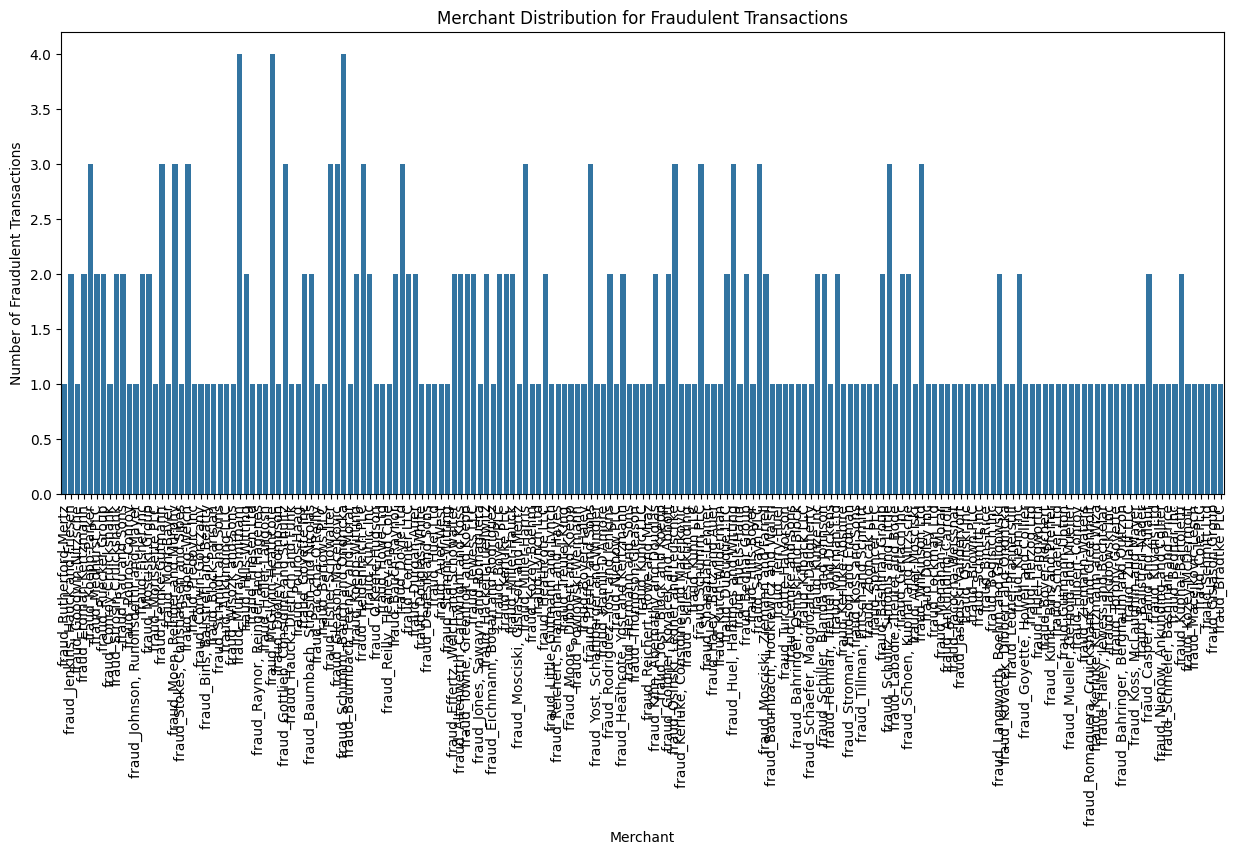

In [ ]:
# merchant distribution for fraudulent transactions

# Filter the dataframe for rows where 'is_fraud' is 1
fraud_df = df[df['is_fraud'] == 1]

# Create a countplot of 'merchant' for fraudulent transactions
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
sns.countplot(x='merchant', data=fraud_df)
plt.title('Merchant Distribution for Fraudulent Transactions')
plt.xlabel('Merchant')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# prompt: create a new column in features called merchant_risk with values 1 or 0. Value is 1 if the merchant's number of fraudulent transactions is in the top50th percentile for the total number of fraudulent transactions. Otherwise, value is 0.

# Group by merchant and count the number of fraudulent transactions
merchant_fraud_counts = fraud_df.groupby('merchant')['is_fraud'].count()

# Calculate the threshold for the top 50th percentile
threshold = merchant_fraud_counts.quantile(0.5)

# Create a new column 'merchant_risk' based on the threshold
features['merchant_risk'] = 0
features.loc[features['merchant'].isin(merchant_fraud_counts[merchant_fraud_counts >= threshold].index), 'merchant_risk'] = 1

In [ ]:
features

,Unnamed: 0,cc_num,merchant,category,amt,first,last,street,city,state,...,merch_lat,merch_long,gender_F,gender_M,year,month,day,hour,minute,merchant_risk
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,...,36.011293,-82.048315,True,False,2019,1,1,0,0,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,...,49.159047,-118.186462,True,False,2019,1,1,0,0,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,...,43.150704,-112.154481,False,True,2019,1,1,0,0,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,...,47.034331,-112.561071,False,True,2019,1,1,0,1,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,...,38.674999,-78.632459,False,True,2019,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,38890,4651007077623147,fraud_Fisher-Schowalter,shopping_net,4.58,Andrea,Lewis,43075 Cohen Shoals,Ashford,WA,...,45.795811,-121.582675,True,False,2020,7,5,2,39,1
38891,38891,4450831335606294,fraud_Kutch LLC,gas_transport,53.10,Donna,Davis,6760 Donovan Lakes,Clayton,OK,...,34.228064,-94.752420,True,False,2020,7,5,2,39,0
38892,38892,377895991033232,"fraud_Rowe, Batz and Goodwin",grocery_pos,114.52,Kimberly,Myers,6881 King Isle Suite 228,Higganum,CT,...,42.300878,-73.483589,True,False,2020,7,5,2,40,0
38893,38893,3541687240161491,fraud_Rutherford-Mertz,grocery_pos,134.40,Mark,Nguyen,62631 Ashley Ramp Apt. 965,Sea Island,GA,...,31.462048,-81.789790,False,True,2020,7,5,2,41,1


In [ ]:
# prompt: calculate the number of values with merchant risk == 1

merchant_risk_count = features['merchant_risk'].value_counts().get(1, 0)
print(f"Number of values with merchant risk == 1: {merchant_risk_count}")

Number of values with merchant risk == 1: 15474


# Understanding the contribution of "state" to the model

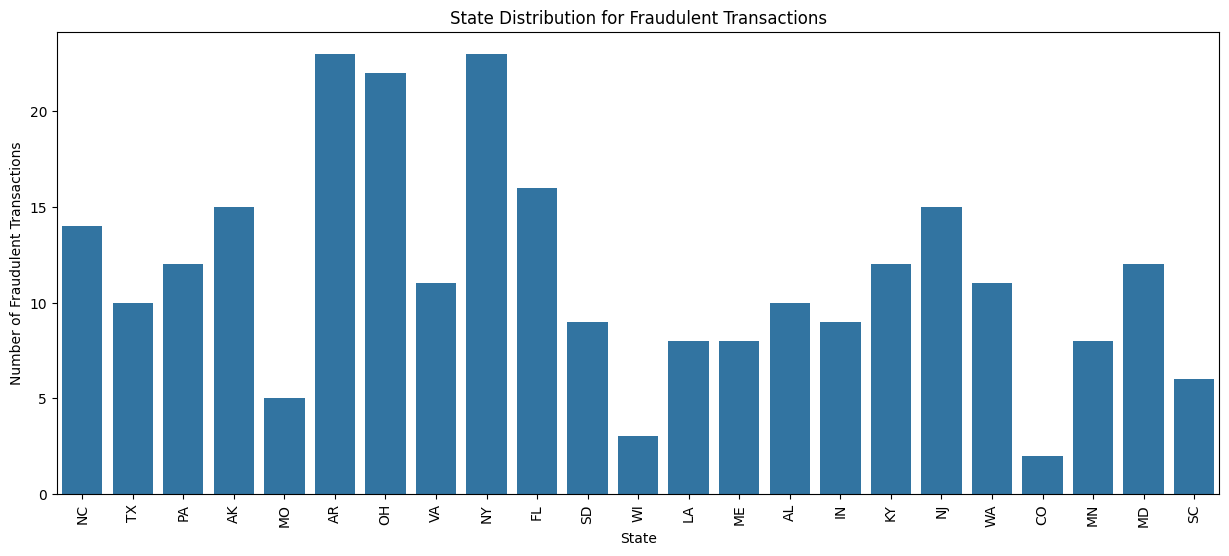

In [ ]:
# prompt: give me a distribution of state in features and if 'is_fraud is true" in target, plot it

# Filter the dataframe for rows where 'is_fraud' is 1
fraud_df = df[df['is_fraud'] == 1]

# Create a countplot of 'state' for fraudulent transactions
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
sns.countplot(x='state', data=fraud_df)
plt.title('State Distribution for Fraudulent Transactions')
plt.xlabel('State')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

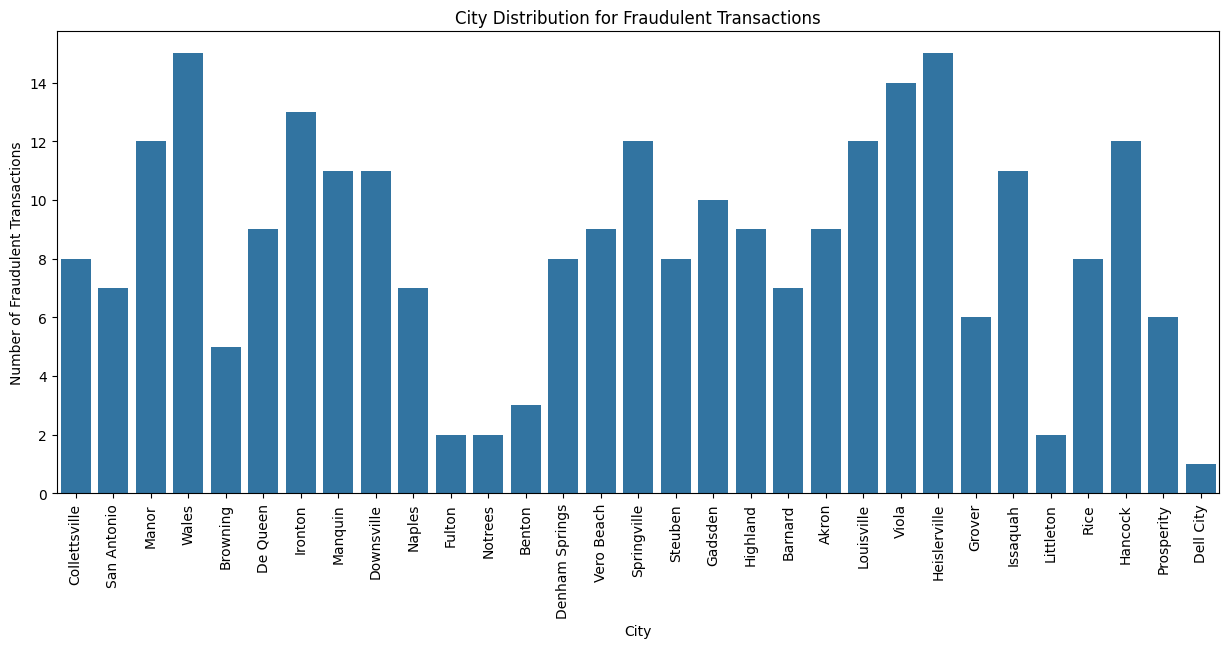

In [ ]:
# prompt: give me a distribution of city in features and if 'is_fraud is true" in target, plot it

# Filter the dataframe for rows where 'is_fraud' is 1
fraud_df = df[df['is_fraud'] == 1]

# Create a countplot of 'city' for fraudulent transactions
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
sns.countplot(x='city', data=fraud_df)
plt.title('City Distribution for Fraudulent Transactions')
plt.xlabel('City')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# prompt: print total percentage of fraudulent transactions in the dataset

fraud_percentage = (df['is_fraud'].sum() / len(df)) * 100
print(f"Total percentage of fraudulent transactions in the dataset: {fraud_percentage:.2f}%")

Total percentage of fraudulent transactions in the dataset: 0.48%


In [ ]:
# prompt: how can i use target encoding to create a column in features 'risk_by_state' with values 1 or 0, where if the 'state' is one that is in the top 50 percentile of the distribution of number of fraudulent transactions by state, the value is 1 else 0. Use the target dataframe to calculate if in the percentile threshold

# Calculate the number of fraudulent transactions per state
fraud_by_state = fraud_df.groupby('state')['is_fraud'].count()

# Calculate the 50th percentile of the fraudulent transactions by state
threshold = fraud_by_state.quantile(0.50)

# Create a new column 'risk_by_state' and initialize it to 0
features['risk_by_state'] = 0

# Assign 1 to 'risk_by_state' if the state is in the top 50th percentile
for state in fraud_by_state.index:
  if fraud_by_state[state] >= threshold:
    features.loc[features['state'] == state, 'risk_by_state'] = 1

In [ ]:
features

,Unnamed: 0,cc_num,merchant,category,amt,first,last,street,city,state,...,merch_long,gender_F,gender_M,year,month,day,hour,minute,merchant_risk,risk_by_state
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,...,-82.048315,True,False,2019,1,1,0,0,0,1
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,...,-118.186462,True,False,2019,1,1,0,0,0,1
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,...,-112.154481,False,True,2019,1,1,0,0,0,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,...,-112.561071,False,True,2019,1,1,0,1,0,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,...,-78.632459,False,True,2019,1,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,38890,4651007077623147,fraud_Fisher-Schowalter,shopping_net,4.58,Andrea,Lewis,43075 Cohen Shoals,Ashford,WA,...,-121.582675,True,False,2020,7,5,2,39,1,1
38891,38891,4450831335606294,fraud_Kutch LLC,gas_transport,53.10,Donna,Davis,6760 Donovan Lakes,Clayton,OK,...,-94.752420,True,False,2020,7,5,2,39,0,0
38892,38892,377895991033232,"fraud_Rowe, Batz and Goodwin",grocery_pos,114.52,Kimberly,Myers,6881 King Isle Suite 228,Higganum,CT,...,-73.483589,True,False,2020,7,5,2,40,0,0
38893,38893,3541687240161491,fraud_Rutherford-Mertz,grocery_pos,134.40,Mark,Nguyen,62631 Ashley Ramp Apt. 965,Sea Island,GA,...,-81.789790,False,True,2020,7,5,2,41,1,0


In [ ]:
# Assuming your DataFrame is named 'features'
count_risk_by_state_1 = features[features['risk_by_state'] == 1].shape[0]

print(f"Number of records with risk_by_state equal to 1: {count_risk_by_state_1}")

Number of records with risk_by_state equal to 1: 18678


In [ ]:
features

,Unnamed: 0,cc_num,merchant,category,amt,first,last,street,city,state,...,merch_long,gender_F,gender_M,year,month,day,hour,minute,merchant_risk,risk_by_state
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,561 Perry Cove,Moravian Falls,NC,...,-82.048315,True,False,2019,1,1,0,0,0,1
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,43039 Riley Greens Suite 393,Orient,WA,...,-118.186462,True,False,2019,1,1,0,0,0,1
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,594 White Dale Suite 530,Malad City,ID,...,-112.154481,False,True,2019,1,1,0,0,0,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,9443 Cynthia Court Apt. 038,Boulder,MT,...,-112.561071,False,True,2019,1,1,0,1,0,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,408 Bradley Rest,Doe Hill,VA,...,-78.632459,False,True,2019,1,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,38890,4651007077623147,fraud_Fisher-Schowalter,shopping_net,4.58,Andrea,Lewis,43075 Cohen Shoals,Ashford,WA,...,-121.582675,True,False,2020,7,5,2,39,1,1
38891,38891,4450831335606294,fraud_Kutch LLC,gas_transport,53.10,Donna,Davis,6760 Donovan Lakes,Clayton,OK,...,-94.752420,True,False,2020,7,5,2,39,0,0
38892,38892,377895991033232,"fraud_Rowe, Batz and Goodwin",grocery_pos,114.52,Kimberly,Myers,6881 King Isle Suite 228,Higganum,CT,...,-73.483589,True,False,2020,7,5,2,40,0,0
38893,38893,3541687240161491,fraud_Rutherford-Mertz,grocery_pos,134.40,Mark,Nguyen,62631 Ashley Ramp Apt. 965,Sea Island,GA,...,-81.789790,False,True,2020,7,5,2,41,1,0


In [ ]:
features = features.drop(['Unnamed: 0', 'merchant', 'job', 'first', 'last', 'state', 'street', 'city'], axis=1, errors='ignore')
features

,cc_num,category,amt,zip,lat,long,city_pop,dob,trans_num,unix_time,...,merch_long,gender_F,gender_M,year,month,day,hour,minute,merchant_risk,risk_by_state
0,2703186189652095,misc_net,4.97,28654.0,36.0788,-81.1781,3495.0,1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,...,-82.048315,True,False,2019,1,1,0,0,0,1
1,630423337322,grocery_pos,107.23,99160.0,48.8878,-118.2105,149.0,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,...,-118.186462,True,False,2019,1,1,0,0,0,1
2,38859492057661,entertainment,220.11,83252.0,42.1808,-112.2620,4154.0,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,...,-112.154481,False,True,2019,1,1,0,0,0,0
3,3534093764340240,gas_transport,45.00,59632.0,46.2306,-112.1138,1939.0,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,...,-112.561071,False,True,2019,1,1,0,1,0,0
4,375534208663984,misc_pos,41.96,24433.0,38.4207,-79.4629,99.0,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,...,-78.632459,False,True,2019,1,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,4651007077623147,shopping_net,4.58,98304.0,46.7531,-121.9898,759.0,1956-09-14,ce04ee1fb9ccc69f02ba293f567842c2,1.372992e+09,...,-121.582675,True,False,2020,7,5,2,39,1,1
38891,4450831335606294,gas_transport,53.10,74536.0,34.5906,-95.3800,1760.0,1972-01-20,d857fc5a5556e25204d036324c95e734,1.372992e+09,...,-94.752420,True,False,2020,7,5,2,39,0,0
38892,377895991033232,grocery_pos,114.52,6441.0,41.4682,-72.5751,5438.0,1964-11-17,0919b95546478bfa444028095f1e5b09,1.372992e+09,...,-73.483589,True,False,2020,7,5,2,40,0,0
38893,3541687240161491,grocery_pos,134.40,31561.0,31.1989,-81.3322,298.0,1963-04-22,d669f956f781a3a0715d851a7f5e7c7e,1.372992e+09,...,-81.789790,False,True,2020,7,5,2,41,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# prompt: give me a visualisation of a distribution of category column in features and is_fraud in target

# Visualize the distribution of 'category' with respect to 'is_fraud'
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=df)
plt.title('Distribution of Transaction Categories with Fraudulent Transactions')
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Is Fraud')
plt.show()

ValueError: Could not interpret value `job` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [52]:
# prompt: remove category column in features

features = features.drop('trans_num', axis=1, errors='ignore')

In [53]:
features

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,gender_F,gender_M,year,month,day,hour,minute,merchant_risk,risk_by_state
0,2703186189652095,4.97,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,True,False,2019,1,1,0,0,0,1
1,630423337322,107.23,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,True,False,2019,1,1,0,0,0,1
2,38859492057661,220.11,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,False,True,2019,1,1,0,0,0,0
3,3534093764340240,45.00,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,False,True,2019,1,1,0,1,0,0
4,375534208663984,41.96,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,False,True,2019,1,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,4651007077623147,4.58,98304.0,46.7531,-121.9898,759.0,1.372992e+09,45.795811,-121.582675,True,False,2020,7,5,2,39,1,1
38891,4450831335606294,53.10,74536.0,34.5906,-95.3800,1760.0,1.372992e+09,34.228064,-94.752420,True,False,2020,7,5,2,39,0,0
38892,377895991033232,114.52,6441.0,41.4682,-72.5751,5438.0,1.372992e+09,42.300878,-73.483589,True,False,2020,7,5,2,40,0,0
38893,3541687240161491,134.40,31561.0,31.1989,-81.3322,298.0,1.372992e+09,31.462048,-81.789790,False,True,2020,7,5,2,41,1,0


In [54]:
# 80% train 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [55]:
# prompt: import standard scaler and standardise x train and x test

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_new = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_new = scaler.transform(X_test)

In [57]:
X_train_new[0]

array([-0.3201933 ,  0.66180567, -1.65594557,  1.19280905,  1.4145928 ,
       -0.29646503,  0.65319515,  1.02786733,  1.37120565,  0.90915281,
       -0.90915281,  0.63217115,  0.94849756, -1.18489047, -1.74268699,
       -1.41609607, -0.62950599, -0.72099904])

Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train_new, y_train)

LogisticRegression(random_state=42)

In [61]:
lr_predictions = lr_model.predict(X_test_new)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_accuracy

0.9965131216737017

# Using SMOTE


In [63]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_new, y_train)


function to evaluate and save model


In [64]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [65]:
# function to evaluate and save models
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
  print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
  print("--------------------------")
  print(f"\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

  with open(filename, 'wb') as file:
    pickle.dump(model, file)

  print(f"Model saved as {filename}")

In [66]:
xgb_model = xgb.XGBClassifier(random_state = 42)
evaluate_and_save_model(xgb_model, X_train_resampled, X_test_new, y_train_resampled, y_test, 'xgboost_smote.pkl')

XGBClassifier Accuracy: 0.9986

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10859
         1.0       0.76      0.90      0.82        39

    accuracy                           1.00     10898
   macro avg       0.88      0.95      0.91     10898
weighted avg       1.00      1.00      1.00     10898

--------------------------

Confusion Matrix:
[[10848    11]
 [    4    35]]

Model saved as xgboost_smote.pkl


In [70]:
dt_model = DecisionTreeClassifier(random_state = 42)
evaluate_and_save_model(dt_model, X_train_new, X_test_new, y_train, y_test, 'dt_model.pkl')

rf_model = RandomForestClassifier(random_state = 42)
evaluate_and_save_model(rf_model, X_train_new, X_test_new, y_train, y_test, 'rf_model.pkl')

nb_model = GaussianNB()
evaluate_and_save_model(nb_model, X_train_new, X_test_new, y_train, y_test, 'nb_model.pkl')

knn_model = KNeighborsClassifier()
evaluate_and_save_model(knn_model, X_train_new, X_test_new, y_train, y_test, 'knn_model.pkl')

svm_model = SVC(random_state = 42)
evaluate_and_save_model(svm_model, X_train_new, X_test_new, y_train, y_test, 'svm_model.pkl')

DecisionTreeClassifier Accuracy: 0.9959

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10859
         1.0       0.45      0.64      0.53        39

    accuracy                           1.00     10898
   macro avg       0.72      0.82      0.76     10898
weighted avg       1.00      1.00      1.00     10898

--------------------------

Confusion Matrix:
[[10828    31]
 [   14    25]]

Model saved as dt_model.pkl
RandomForestClassifier Accuracy: 0.9983

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10859
         1.0       0.92      0.59      0.72        39

    accuracy                           1.00     10898
   macro avg       0.96      0.79      0.86     10898
weighted avg       1.00      1.00      1.00     10898

--------------------------

Confusion Matrix:
[[10857     2]
 [   16    23]]

Model saved as rf_model.pkl
Gaussi

In [71]:
# prompt: Give me the python code to perform grid search to find the optimal hyperparameters for the xgb_model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create a XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best estimator
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgb_model.predict(X_test_new)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best XGBoost Model Accuracy: {accuracy:.4f}")

# Save the best model
with open('best_xgboost_model_gridsearch.pkl', 'wb') as file:
  pickle.dump(best_xgb_model, file)

print("Best model saved as best_xgboost_model_gridsearch.pkl")

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best Score: 0.9994350162831426
Best XGBoost Model Accuracy: 0.9984
Best model saved as best_xgboost_model_gridsearch.pkl


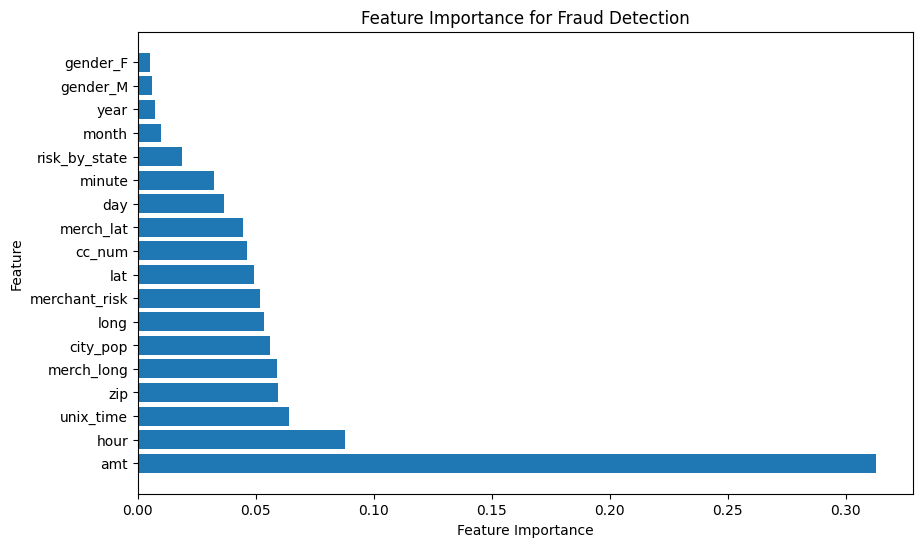

In [72]:
# prompt: horizontal bar plot to show feature importances for each column in features

import matplotlib.pyplot as plt

# Assuming you have trained a model like 'rf_model' and it has a 'feature_importances_' attribute
# Replace 'rf_model' with your actual model
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Fraud Detection')
plt.show()

In [73]:
# Ensembling
# Implement stacking and voting classifiers
from sklearn.ensemble import VotingClassifier, StackingClassifier
voting_clf = VotingClassifier(
    estimators=[('xgboost', xgb.XGBClassifier(random_state = 42)), ('rf', RandomForestClassifier(random_state = 42)), ('svm', SVC(random_state = 42, probability = True))],
    voting='soft'
)
stacking_clf = StackingClassifier(
    estimators=[('xgboost', xgb.XGBClassifier(random_state = 42)), ('rf', RandomForestClassifier(random_state = 42)), ('svm', SVC(random_state = 42, probability = True))],
    final_estimator=LogisticRegression(random_state = 42)
)


In [75]:
evaluate_and_save_model(voting_clf, X_train_new, X_test_new, y_train, y_test, 'voting_classifier.pkl')
evaluate_and_save_model(stacking_clf, X_train_new, X_test_new, y_train, y_test, 'stacking_classifier.pkl')

VotingClassifier Accuracy: 0.9984

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10859
         1.0       0.96      0.59      0.73        39

    accuracy                           1.00     10898
   macro avg       0.98      0.79      0.86     10898
weighted avg       1.00      1.00      1.00     10898

--------------------------

Confusion Matrix:
[[10858     1]
 [   16    23]]

Model saved as voting_classifier.pkl
StackingClassifier Accuracy: 0.9990

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10859
         1.0       0.97      0.74      0.84        39

    accuracy                           1.00     10898
   macro avg       0.98      0.87      0.92     10898
weighted avg       1.00      1.00      1.00     10898

--------------------------

Confusion Matrix:
[[10858     1]
 [   10    29]]

Model saved as stacking_classifier.

In [76]:
features


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,gender_F,gender_M,year,month,day,hour,minute,merchant_risk,risk_by_state
0,2703186189652095,4.97,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,True,False,2019,1,1,0,0,0,1
1,630423337322,107.23,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,True,False,2019,1,1,0,0,0,1
2,38859492057661,220.11,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,False,True,2019,1,1,0,0,0,0
3,3534093764340240,45.00,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,False,True,2019,1,1,0,1,0,0
4,375534208663984,41.96,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,False,True,2019,1,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,4651007077623147,4.58,98304.0,46.7531,-121.9898,759.0,1.372992e+09,45.795811,-121.582675,True,False,2020,7,5,2,39,1,1
38891,4450831335606294,53.10,74536.0,34.5906,-95.3800,1760.0,1.372992e+09,34.228064,-94.752420,True,False,2020,7,5,2,39,0,0
38892,377895991033232,114.52,6441.0,41.4682,-72.5751,5438.0,1.372992e+09,42.300878,-73.483589,True,False,2020,7,5,2,40,0,0
38893,3541687240161491,134.40,31561.0,31.1989,-81.3322,298.0,1.372992e+09,31.462048,-81.789790,False,True,2020,7,5,2,41,1,0
